In [5]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Initialize the SVM classifier with linear kernel
clf = SVC(kernel='linear')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and f1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification report for detailed metrics per class
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Print efficacy metrics
print(f'Accuracy: {accuracy:.2f}')
print('Precision per class:', precision)
print('Recall per class:', recall)
print('F1-Score per class:', f1)
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 0.97
Precision per class: [1.         1.         0.91666667]
Recall per class: [1.         0.88888889 1.        ]
F1-Score per class: [1.         0.94117647 0.95652174]

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [6]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update weights with regularization term only
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update weights and bias for misclassified samples
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

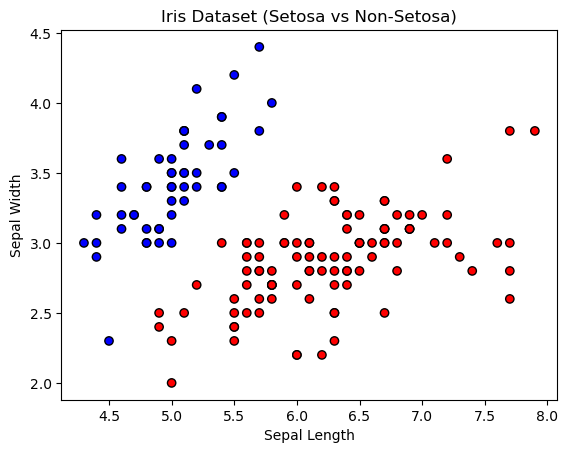

In [7]:
data = load_iris()
X = data.data[:, :2]  # only first two features for visualization
y = data.target
y = np.where(y == 0, -1, 1)  # Setosa vs Non-Setosa binary labels

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs Non-Setosa)')
plt.show()

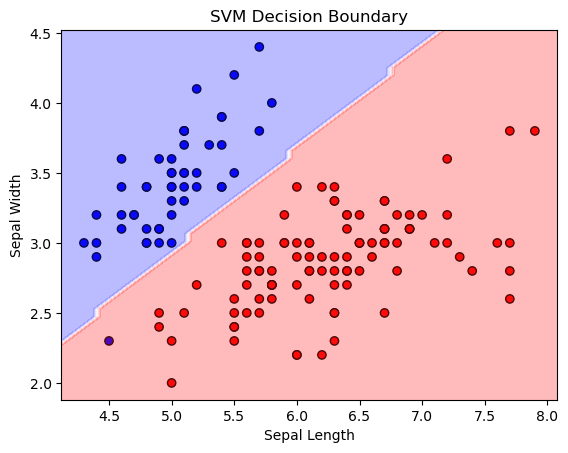

In [8]:
# Train SVM
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, svm)